**Importing Dataset**

In [ ]:
import pandas as pd

df = pd.read_csv("/content/creditcard1.csv")

**Printing first 5 rows of database**

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Schema information of our imported dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    664 non-null    int64  
 1   V1      664 non-null    float64
 2   V2      664 non-null    float64
 3   V3      664 non-null    float64
 4   V4      664 non-null    float64
 5   V5      664 non-null    float64
 6   V6      664 non-null    float64
 7   V7      664 non-null    float64
 8   V8      664 non-null    float64
 9   V9      664 non-null    float64
 10  V10     664 non-null    float64
 11  V11     664 non-null    float64
 12  V12     664 non-null    float64
 13  V13     664 non-null    float64
 14  V14     664 non-null    float64
 15  V15     664 non-null    float64
 16  V16     664 non-null    float64
 17  V17     664 non-null    float64
 18  V18     664 non-null    float64
 19  V19     664 non-null    float64
 20  V20     664 non-null    float64
 21  V21     664 non-null    float64
 22  V2

**Creating random test and train split from our dataset**

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'target_variable' is the name of your target variable column
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

**Training Random forest and SVM model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = {
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score

results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted') # Adjust 'average' as needed
    results.append([name, accuracy, precision])

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision'])
display(results_df)

,Model,Accuracy,Precision
0,Random Forest,1.0,1.0
1,Support Vector Machine,1.0,1.0


**Prinitng visualization of class distribution in our dataset**

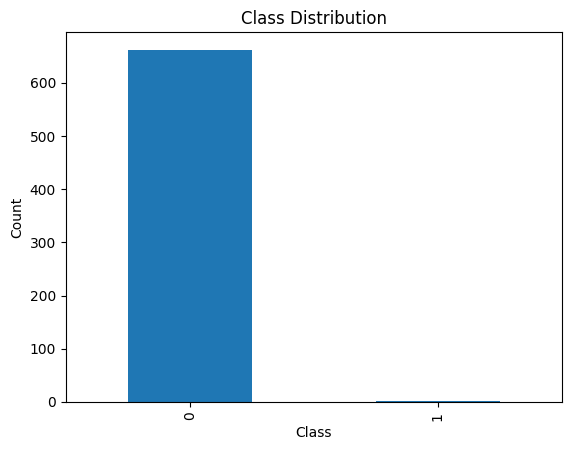

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'target_variable' is the name of your target variable column
df['Class'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

**Training Logistic regression and Random Forest and SVM classifier on original split data**

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score
import pandas as pd

# Assuming 'df' is your DataFrame
X = df.drop('Class', axis=1)  # Replace 'target_variable' with 'Class'
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Train Classifiers
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

for name, model in models.items():
    model.fit(X_resampled, y_resampled)

# Evaluate and Display Results
results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted') # Adjust 'average' as needed
    results.append([name, accuracy, precision])

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision'])
display(results_df)

,Model,Accuracy,Precision
0,Logistic Regression,0.751880,1.0
1,Random Forest,0.984962,1.0
2,Support Vector Machine,0.924812,1.0


**Implmenting Class imbalabce handling tecniques Undersampling and oversampling**

In [ ]:
import plotly.express as px
import pandas as pd

# Create a DataFrame from the resampled data
resampled_df = pd.DataFrame(X_resampled)
resampled_df['Class'] = y_resampled  # Assuming 'Class' is your target variable name

# Count the occurrences of each class
class_counts = resampled_df['Class'].value_counts()

# Create a bar chart using Plotly
fig = px.bar(class_counts, x=class_counts.index, y=class_counts.values,
             labels={'x': 'Class', 'y': 'Count'},
             title='Class Distribution After Undersampling')

fig.show()

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score
import pandas as pd
import plotly.express as px

# Assuming 'df' is your original DataFrame
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Resampling techniques
samplers = {
    'Random Undersampling': RandomUnderSampler(random_state=42),
    'Random Oversampling': RandomOverSampler(random_state=42)  # Replaced SMOTE with RandomOverSampler
}

results = []
for sampler_name, sampler in samplers.items():
    # Resample
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

    # Train Classifiers
    models = {
        'Logistic Regression': LogisticRegression(),
        'Random Forest': RandomForestClassifier(),
        'Support Vector Machine': SVC()
    }
    for model_name, model in models.items():
        model.fit(X_resampled, y_resampled)

        # Evaluate
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        results.append([sampler_name, model_name, accuracy, precision])

    # Visualize
    resampled_df = pd.DataFrame(X_resampled)
    resampled_df['Class'] = y_resampled
    class_counts = resampled_df['Class'].value_counts()
    fig = px.bar(class_counts, x=class_counts.index, y=class_counts.values,
                 labels={'x': 'Class', 'y': 'Count'},
                 title=f'Class Distribution After {sampler_name}')
    fig.show()

# Print Results
results_df = pd.DataFrame(results, columns=['Sampler', 'Model', 'Accuracy', 'Precision'])
display(results_df)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



,Sampler,Model,Accuracy,Precision
0,Random Undersampling,Logistic Regression,0.751880,1.0
1,Random Undersampling,Random Forest,0.992481,1.0
2,Random Undersampling,Support Vector Machine,0.924812,1.0
3,Random Oversampling,Logistic Regression,0.977444,1.0
4,Random Oversampling,Random Forest,1.000000,1.0
5,Random Oversampling,Support Vector Machine,0.796992,1.0


**Finding best hyperpartameters for Random Forest classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features':  ['sqrt', 0.5]
}

# Create Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)  # Use your resampled data

# Print best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)

# Get the best model
best_rf = grid_search.best_estimator_





Best parameters found:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy score:  1.0
